# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. Использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import GridSearchCV


from scipy import stats as st

In [2]:
# Прочитаем исходные файлы
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

# Изучим полученные таблицы
datas = [df_train, df_test, df_full]
for file in datas:
    display(file.info())
    display(file.shape)
    display(file.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

None

(14149, 87)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

None

(5290, 53)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

None

(19439, 87)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
# В связи с тем, что данные в соседних строках близки по значениям, заполним нулевые данные значениями из соседних строк
for file in datas:
    file.ffill(axis = 0, inplace = True)
    display(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant             

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19439 non-null float64
final.output.concentrate_pb                           19439 non-null float64
final.output.concentrate_sol                          19439 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19439 non-null float64
final.output.tail_pb                                  19439 non-null float64
final.output.tail_sol                                 19439 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19439 non-null float64
primary_cleaner.input.depressant             

None

In [4]:
# Вычислим эффективность обогащения золота на обучающей выборке. Найдем MAE между нашими расчётами и значением признака
# в обучающей выборке

C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

rougher_output_recovery = pd.Series(C*(F-T)*100/F/(C-T))

display(df_train['rougher.output.recovery'].head())
display(rougher_output_recovery.head())

# Рассчитам среднюю эффективность обогащения золота
print('Средняя эффективность обогащения золота заданная', df_train['rougher.output.recovery'].mean())
print('Средняя эффективность обогащения золота рассчитанная', rougher_output_recovery.mean())

print('Среднее абсолютное отклонение', mean_absolute_error(df_train['rougher.output.recovery'], rougher_output_recovery))

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

Средняя эффективность обогащения золота заданная 82.70450164550293
Средняя эффективность обогащения золота рассчитанная 82.70450164550293
Среднее абсолютное отклонение 1.1417477403204992e-14


**Вывод**

Мы провели предобработку данных: заполнили нулевые значения данными соседних строк. Далее посчитали эффективность обогащения золота. Средние значения оказались равны. Среднее абсолютное отклонение близко к нулю и возникло, скорее всего, в результате заполнения нулевых значений неточными данными. Можно сделать вывод, что среднее абсолютное отклонение в заданной таблице рассчитано верно.

Мы видим, что в тестовой выборке отсутствуют значения параметров, получаемых в результате обогащения руды на различных этапах, а также расчетные параметры. Т.е. из четырех возможных этапов отсутствует final, а из четырех типов параметра отсутствуют output и calculation.

Отсутствующие признаки являются результатом работы по обогащению руды. Для обучения модели в тренировочной выборке столбцы с указанными признаками необходимо будет удалить.

## Анализ данных

In [5]:
# Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
print('Золото')
print(df_train['rougher.input.feed_au'].mean())
print(df_train['rougher.output.concentrate_au'].mean())
print(df_train['primary_cleaner.output.concentrate_au'].mean())
print(df_train['final.output.concentrate_au'].mean())
print()

print('Серебро')
print(df_train['rougher.input.feed_ag'].mean())
print(df_train['rougher.output.concentrate_ag'].mean())
print(df_train['primary_cleaner.output.concentrate_ag'].mean())
print(df_train['final.output.concentrate_ag'].mean())
print()

print('Свинец')
print(df_train['rougher.input.feed_pb'].mean())
print(df_train['rougher.output.concentrate_pb'].mean())
print(df_train['primary_cleaner.output.concentrate_pb'].mean())
print(df_train['final.output.concentrate_pb'].mean())
print()

Золото
7.866576841919407
19.43995785143646
32.386835978391346
44.00379162105571

Серебро
8.579195196596277
11.775812314356036
8.200915815165981
5.141920924857091

Свинец
3.5054646776095564
7.664554751481546
9.568544006770484
10.132847758146394



**Вывод**

Рассчитав среднюю концентрация металлов на различных этапах очистки, мы видим, что концентрация золота существенно растет от этапа к этапу, концентрация серебра сначала несущественно растет, потом снижается, концентрация свинца растет, но не значительно.

In [6]:
# Исследуем суммарную концентрацию всех веществ на разных стадиях.
print((df_train['rougher.input.feed_au']+df_train['rougher.input.feed_ag']+
       df_train['rougher.input.feed_pb']+df_train['rougher.input.feed_sol']).mean())

print((df_train['rougher.output.concentrate_au']+df_train['rougher.output.concentrate_ag']+
       df_train['rougher.output.concentrate_pb']+df_train['rougher.output.concentrate_sol']).mean())

print((df_train['primary_cleaner.output.concentrate_au']+df_train['primary_cleaner.output.concentrate_ag']+
       df_train['primary_cleaner.output.concentrate_pb']+df_train['primary_cleaner.output.concentrate_sol']).mean())

print((df_train['final.output.concentrate_au']+df_train['final.output.concentrate_ag']+
       df_train['final.output.concentrate_pb']+df_train['final.output.concentrate_sol']).mean())

56.24216956828632
67.17314539700826
60.17254606958831
68.387871746922


**Вывод**

Проанализировав суммарную концентрацию всех веществ на разных стадиях мы видим, что после проведения первой стадии очистки суммарная концентрация снижается, однако затем вновь возрастает после финальной стадии очистки.

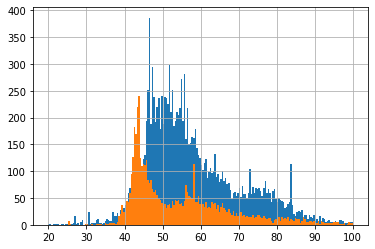

In [7]:
# Проанализируем диаграммы распределения размеров гранул сырья на обучающей и тестовой выборках.
df_train['rougher.input.feed_size'].hist(bins = 200, range=(20, 100))
df_test['rougher.input.feed_size'].hist(bins = 200, range=(20, 100))



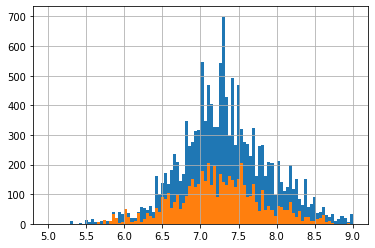

In [8]:
df_train['primary_cleaner.input.feed_size'].hist(bins = 100, range=(5, 9))
df_test['primary_cleaner.input.feed_size'].hist(bins = 100, range=(5, 9))

**Вывод**

Проанализированы диаграммы распределения размеров гранул сырья на обучающей и тестовой выборках. Мы видим, что набор данных в обоих случаях скошен вправо. Диаграммы похожи, следовательно, распределения не сильно отличаются друг от друга, оценка модели будет правильной.

## Модель

In [9]:
# Функция расчета smape
def smape(target, predict): 
    return (100/len(target)) * np.sum(2 * np.abs(target - predict) / (np.abs(target) + np.abs(predict)))

# Создадим свою метрику
smape_scorer = make_scorer(smape, greater_is_better=True)

In [10]:
# Дополним тестовую таблицу недостающими целевыми параметрами rougher.output.recovery и final.output.recovery.
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery','final.output.recovery']], on='date')
df_test.info()

# Оставим в обучающей выборке те столбцы, которые есть в тестовой
df_train = df_train[df_test.columns]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [11]:
# Сформируем выборки для целевого параметра rougher.output.recovery
features_1 = df_train.loc[:, 'rougher.input.feed_ag': 'rougher.state.floatbank10_f_level']
target_1 = df_train['rougher.output.recovery']

In [12]:
# Найдем лучшие гиперпараметры для модели
model = DecisionTreeRegressor()
parameters = {'max_depth':[125,128,129,130,131,132,133,135,140,150]}
 
grid = GridSearchCV(model, parameters, cv = 5, scoring = smape_scorer)
grid.fit(features_1, target_1)

grid.best_params_

{'max_depth': 130}

In [13]:
# Найдем лучшие гиперпараметры для модели
model = RandomForestRegressor()

parametrs = { 'n_estimators': range (30, 51, 10),
              'max_depth': range (9,13, 2) }

grid = GridSearchCV(model, parametrs, cv=5, scoring = smape_scorer)
grid.fit(features_1, target_1)

grid.best_params_

{'max_depth': 11, 'n_estimators': 50}

In [14]:
# Найдем лучшие гиперпараметры для модели
model = LinearRegression()
parametrs = {'fit_intercept' : [True, False], 'copy_X': [True, False], 'n_jobs' :[None, -1]}

grid = GridSearchCV(estimator = model, param_grid = parametrs, cv = 5, scoring = smape_scorer)
grid.fit(features_1, target_1)

grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None}

In [15]:
# Сформируем выборки для целевого параметра final.output.recovery
features_2 = df_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_2 = df_train['final.output.recovery']

In [16]:
# Найдем лучшие гиперпараметры для модели
model = DecisionTreeRegressor()
parameters = {'max_depth':[160,161,162,163,164]}
 
grid = GridSearchCV(model, parameters, cv = 5, scoring = smape_scorer)
grid.fit(features_2, target_2)

grid.best_params_

{'max_depth': 163}

In [17]:
# Найдем лучшие гиперпараметры для модели
model = RandomForestRegressor()

parametrs = { 'n_estimators': range (10, 31, 10),
              'max_depth': range (5,11, 2) }

grid = GridSearchCV(model, parametrs, cv=5, scoring = smape_scorer)
grid.fit(features_2, target_2)

grid.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [18]:
# Найдем лучшие гиперпараметры для модели
model = LinearRegression()
parametrs = {'fit_intercept' : [True, False], 'copy_X': [True, False], 'n_jobs' :[None, -1]}

grid = GridSearchCV(estimator = model, param_grid = parametrs, cv = 5, scoring = smape_scorer)
grid.fit(features_2, target_2)

grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None}

In [19]:
# Посчитаем smape моделей с лучшими гиперпараметрами для целевого признака rougher.output.recovery
features_train, features_valid, target_train, target_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

model_1_1 = DecisionTreeRegressor(random_state=12345, max_depth=130) 
model_1_1.fit(features_train, target_train)
predictions_valid = model_1_1.predict(features_valid)

result_1_1 = smape(target_valid, predictions_valid)
print('DecisionTreeRegressor', result_1_1)


model_1_2 = RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=11)
model_1_2.fit(features_train, target_train)
predictions_valid = model_1_2.predict(features_valid)

result_1_2 = smape(target_valid, predictions_valid)
print('RandomForestRegressor', result_1_2)


model_1_3 = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None)
model_1_3.fit(features_train, target_train)
predictions_valid = model_1_3.predict(features_valid)

result_1_3 = smape(target_valid, predictions_valid)
print('LinearRegression',result_1_3)

DecisionTreeRegressor 9.00405074639054
RandomForestRegressor 9.451898554652793
LinearRegression 11.634562902094572


In [20]:
# Посчитаем smape моделей с лучшими гиперпараметрами для целевого признака final.output.recovery
features_train, features_valid, target_train, target_valid = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

model_2_1 = DecisionTreeRegressor(random_state=12345, max_depth=161) 
model_2_1.fit(features_train, target_train)
predictions_valid = model_2_1.predict(features_valid)

result_2_1 = smape(target_valid, predictions_valid)
print('DecisionTreeRegressor', result_2_1)


model_2_2 = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=7)
model_2_2.fit(features_train, target_train)
predictions_valid = model_2_2.predict(features_valid)

result_2_2 = smape(target_valid, predictions_valid)
print('RandomForestRegressor', result_2_2)


model_2_3 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
model_2_3.fit(features_train, target_train)
predictions_valid = model_2_3.predict(features_valid)

result_2_3 = smape(target_valid, predictions_valid)
print('LinearRegression', result_2_3)

DecisionTreeRegressor 9.612786396204722
RandomForestRegressor 7.692003067287705
LinearRegression 8.596337649103136


In [21]:
# Посчитаем итоговый smape для тренировочной выборки
final_smape = 0.25 * result_1_1 + 0.75 * result_2_2
print('Итоговый smape для тренировочной выборки:', final_smape)

Итоговый smape для тренировочной выборки: 8.020014987063414


In [22]:
# Протестируем лучшие модели на тестовой выборке

# Сформируем выборки для целевого параметра rougher.output.recovery
features_1 = df_test.loc[:, 'rougher.input.feed_ag': 'rougher.state.floatbank10_f_level']
target_1 = df_test['rougher.output.recovery']

features_train, features_valid, target_train, target_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

model = DecisionTreeRegressor(random_state=12345, max_depth=130) 
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

result_1 = smape(target_valid, predictions_valid)
print('DecisionTreeRegressor', result_1)

# Сформируем выборки для целевого параметра final.output.recovery
features_2 = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_2 = df_test['final.output.recovery']

features_train, features_valid, target_train, target_valid = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)

model = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=7)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

result_2 = smape(target_valid, predictions_valid)
print('RandomForestRegressor', result_2)

DecisionTreeRegressor 5.384651307739736
RandomForestRegressor 8.250635981405631


In [23]:
# Посчитаем итоговый smape для тестовой выборки
final_smape = 0.25 * result_1 + 0.75 * result_2
print('Итоговый smape для тренировочной выборки:', final_smape)

Итоговый smape для тренировочной выборки: 7.534139812989158


In [24]:
# Сформируем выборки для целевого параметра rougher.output.recovery
predictions_1 = model_1_1.predict(features_1)
result_1 = smape(target_1, predictions_1)
print('DecisionTreeRegressor', result_1)

predictions_2 = model_2_2.predict(features_2)
result_2 = smape(target_2, predictions_2)
print('DecisionTreeRegressor', result_2)

# Посчитаем итоговый smape для тестовой выборки
final_smape = 0.25 * result_1 + 0.75 * result_2
print('Итоговый smape для тренировочной выборки:', final_smape)

DecisionTreeRegressor 22.991439806745547
DecisionTreeRegressor 10.093596905998982
Итоговый smape для тренировочной выборки: 13.318057631185624


**Вывод**

С помощью пакета GridSearchCV нами подобраны оптимальные гиперпараметры для трех видов моделей, выбраны модели с наименьшим значением метрики smape. 

Выбранные модели протестированы на тестовой выборке, рассчитано итоговое значение smape для промежуточного и финального параметров обогащения золотосодержащей руды.